# Midterm exam

This exam is open-notebook and open-web. It's also open-instructor, in the coding sections of the exam; if you run into a bug that you can't explain after a few tries, I'm willing to take a look at your code.

We start with three short essay questions, each of which can be answered in a paragraph or so. The first two paragraphs can be pretty brief. The third one might run a bit longer, or might become two paragraphs.

## Short essay questions.

#### 1. Overfitting.

What is "overfitting"? And why is this problem especially likely to arise when we model unstructured datasets (for instance, a collection of tweets or novels, rather than a simple table with five or six columns)?


Answer for 1:

Overfitting is the problem of a classifier becoming too well trained by a particular dataset. When training a model on any dataset, it is easy enough with unsupervised learning to make an algorithm fit very closely to a dataset as it adds "dimensions" to the "space" that it is modeling. In this scenario, an algorithm might fit the data by bending the "surface" of the classifier plane extremely closely around all the variation in the dataset until it essentially fits it perfectly. The problem here is that the model will not have good predicitve accuracy on new data thrown at it. There is a tradeoff between bias and variance. 

#### 2. Cross-validation.

What does it mean to cross-validate a model? What's the point of doing this?

Answer for 2:

Cross validation is the process by which you test a model by training it on some smaller portion of a dataset (1/5) for instance, and then test the model on the remaining portion of the dataset (the remaining 4/5). What is great about CV is that you can break your dataset into whatever number of subsets you want, and then go through successively-- training the model on one subset, testing it on the remaining data, then moving on to the next subset, training, and testing, and etc. The point of doing this is to ensure that your algorithm is not simply overfitting the data but is succeeding at modeling the diversity of the data. The point of these analytical tools is to predict, so it's useful to have multiple chances to make predictions and then test them.  

#### 3. Interpreting models of the human past.

Beyond general quantitative pitfalls like "overfitting," why does it become challenging to draw historical and cultural conclusions from a quantitative model?

Choose any (single) article from the set we discussed in the week of March 12, and explain why the interpretive problems it confronts emerge specifically from the complexity of the human subject-matter.

Answer for 3:

There are many ways to come at this question. But my basic answer is rooted first in a skepticism about how a quantitative researcher knows when the structures and/or patterns revealed in a quantitative analysis are distinctive, and relative to what? So for instance, Martin During points out the role of brokers who connected refugee Jews with trusted helpers during WWII. It's a convincing article on many levels, but its underlying logic remains open to the critique that the patterns identified here may not be so unique, and may not be a function of the phenomena to which During ascribes them, but may be more universal on the one hand or completely accidental on the other. The fact of a number of these observed relationships among the kinds of people he is interested in cannot be conclusive without more contextualization and/or comparison. Surely it leads to a viable hypothesis about the function and purpose of these relationships; but the correlation/causation dilemma persists. I think a similar thing can be said about the "Linguistic Markers of Status in Food Culture: Bourdieu’s Distinction in a Menu Corpus." Chalking the quantitative differences between word occurence in high-brow/ low-brow restaurants' menus up to underlying meanings or narratives told by these restaurants makes a great deal of sense. But other factors might also help to explain these differences. 

An second and even more basic thought about the pitfalls of quantitative models for cultural analysis has to do with the near impossibility of finding phenomena, in the wild, prior to one's assumptions. For instance, in both of these essays, cases are sampled from a larger universe of social networks and restaurant menu descriptions; the authors need to be careful that their quantitative analysis does not simply add numbers to a set of distinctions they themselves made prior to selecting their data from the often much more complex social/cultural landscape from which they are sampling.   

## Coding questions.

### 1. Surviving the *Titanic.*

We have good records about the passengers who were aboard the *Titanic* when it sank in 1912. (The provenance of the data is difficult to track, but I think this particular form of the dataset comes from [a Kaggle machine learning competition.](https://www.kaggle.com/c/titanic))

Let's use a sample of the data to rehearse methods of exploratory data analysis in Pandas.

First, read in the dataset (```titanic.csv```). What do you have?

The dataset has twelve columns, but here are some important or perplexing ones:

    **Survived**: A value of 1 indicates that the passenger survived. 0, didn't.
    **Pclass**: Did the passenger buy a 1st, 2nd, or 3rd-class ticket?
    **Sex**: Is coded as "male" or "female." This may really be "gender," since I doubt that ticket agents checked the passengers' biological sex in 1912, but we'll let that pass.
    **Age**: In years.
    **Embarked**: Which port the passenger sailed from.
    **Sibsp**: How many siblings or spouses the passenger had on board.
    **Parch**: How many parents or children the passenger had on board.

Let's start by answering some simple questions.

#### 1. What percentage of passengers survived, overall?
#### 2. What was the gender balance, overall, among passengers? Say, what fraction were women?


In [1]:
# Import the dataset, and use the ```.head()``` method to glance at the first few rows.

# Here are a few module imports to get you started.

import os, math
# you won't need math right here, but we will need it later on

import pandas as pd

# Some code is needed here, to read in the data.
titanic = pd.read_csv('titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Insert code here to calculate (1) the fraction of passengers who survived, and (2) the fraction who were women.
import numpy as np
by_survived = titanic.groupby('Survived')
count_survived = by_survived.count()['Name']
by_sex = titanic.groupby('Sex')
count_women = by_sex.count()['Name']
# Not sure if this is the way to do this...
# It certainly gives the fraction that I believe I'm looking for, but it seems like an inelegant way to do it.
pct_survived = ((count_survived[1])/ (count_survived[0]+ count_survived[1]))
pct_women = (count_women[0] / (count_women[0] + count_women[1]))


print('The fraction of passengers who survived the Titanic is {}. The fraction of passengers who were women is {}'.format(pct_survived, pct_women))

The fraction of passengers who survived the Titanic is 0.3838383838383838. The fraction of passengers who were women is 0.35241301907968575


#### 3. Now let's make that slightly more complex. Did the passengers really follow a policy of "women and children first"?

Let's start answer that by producing a bar graph that indicates how the probability of survival varied across Sex. In other words, we want to have one bar that indicates the probability of survival for men (not the raw number of men surviving but the *fraction* who survived), and a second bar indicating the probability for women.

You can use the split-apply-combine method from week 3 to summarize the data. Note that simply averaging (taking the mean) across a column that is either 0 or 1 will in effect give you the probability of finding a 1 in that column.

In [3]:
# (3): Code is needed here to split-apply-combine,
# and then produce a bar graph.
# First split into sex, then look at survival.
by_sex = titanic.groupby('Sex')
mean_by_sex = by_sex.aggregate(np.mean)['Survived']
mean_by_sex


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

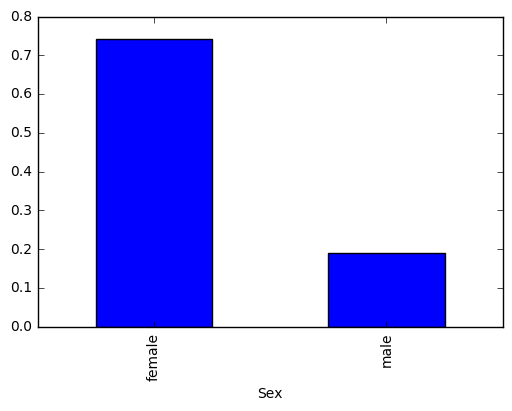

In [4]:
import matplotlib.pyplot as plt
mean_by_sex.plot(kind = 'bar')
plt.show()

#### 4. One final twist.

What about the relationship of "ticket class" to survival? And how did that interact with gender?

See if you can produce a visualization that plots probability of survival broken out by Pclass and Sex at the same time. For instance, it could take the form of two lines (one for men and one for women), with the y axis indicating probability of survival, and the x axis indicating ticket class (1, 2, or 3). It's also possible to achieve the same thing with a bar graph (using paired bars). We did a version of that in week 3. Either solution is fine.

In [5]:
## (4): Code is needed here to produce a visualization that
## reveals probability of survival broken out by Pclass
## and Sex at the same time.
by_class = titanic.groupby('Pclass')
count_by_class = by_class.count()['Sex']

mean_by_class = by_class.aggregate(np.mean)['Survived']
mean_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [6]:
sex_by_class = titanic.groupby(['Sex', 'Pclass'])
prob_sex_by_class = sex_by_class.aggregate(np.mean)['Survived']



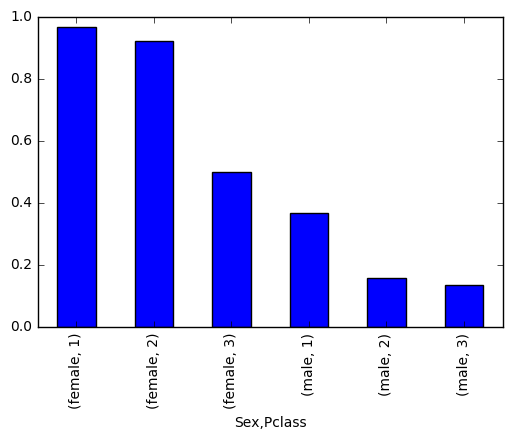

In [7]:

prob_sex_by_class.plot(kind = 'bar')
plt.show()

### 2. Ham or spam?

Now let's move to predictive modeling of less structured data.

#### Part 1.

I've provided you with part of [a spam dataset developed by Almeida et al.](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) Each row in this dataset contains an SMS message. 747 of them were flagged by users as "spam," and 747 are legitimate--for our purposes, "ham." (In case this etymology is vanishing in the mists of time: spam was originally a kind of canned meat.)

There are two columns in the dataset. **Category** contains a flag indicating whether the message is spam; **text** contains the raw text of the message itself.

Your first goals are to:

1. Read this dataset (```hamorspam.csv```) in as a pandas DataFrame, and create a new column ```isspam```, which contains 1 if the row is spam, and 0 otherwise.

2. Create a termdoc matrix based on the top 1000 words in the dataset. Use the ```.head()``` method to print out a few rows.

3. Import multinomial Naive Bayes amd cross_val_score from sklearn; then do five-fold crossvalidation to estimate the accuracy of multinomial Naive Bayes on this dataset.

Try to do each of those things in a separate cell of this notebook. The homework solution from week 6 (Feb 19-25) should be a useful guide here.

In [19]:
# (1): Read in hamorspam.csv; create a numeric column "isspam."
hamorspam = pd.read_csv('hamorspam.csv')
hamorspam['isspam'] = hamorspam.category.map({'ham':0, 'spam':1})

    
hamorspam.head(10)


,category,text,isspam
0,spam,You are being contacted by our dating service ...,1
1,spam,Please call our customer service representativ...,1
2,spam,Guess who am I?This is the first time I create...,1
3,spam,You have been selected to stay in 1 of 250 top...,1
4,spam,I don't know u and u don't know me. Send CHAT ...,1
5,ham,How's it going? Got any exciting karaoke type ...,0
6,ham,Yeah I can still give you a ride,0
7,ham,You are a very very very very bad girl. Or lady.,0
8,ham,Are we doing the norm tomorrow? I finish just ...,0
9,spam,Call FREEPHONE 0800 542 0578 now!,1


In [34]:
# (2): Create a termdoc matrix. There are several ways to do this, but CountVectorizer
# will save you some work.

from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(max_features = 1000)

sparse_matrix = countvec.fit_transform(hamorspam['text'])
termdoc = pd.DataFrame(sparse_matrix.toarray(), columns=countvec.get_feature_names())
termdoc.head(10)
termdoc.shape

(1494, 1000)

In [21]:
# (3): Import Multinomial Naive Bayes and cross_val_score;
# estimate the predictive accuracy of Naive Bayes, using
# five-fold crossvalidation.

from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score
mnb = MultinomialNB()
scores = cross_val_score(mnb, termdoc.as_matrix(), hamorspam['isspam'], cv=5)
print(sum(scores) / len(scores))
scores

0.951140939597


array([ 0.96      ,  0.94      ,  0.95302013,  0.95302013,  0.94966443])

**One final question.** By the way, one of the things I did to prepare this data for you was to rebalance it so that there were even numbers of "spam" and "ham" messages. I did this because we've practiced cross-validation using a simple accuracy measure that doesn't distinguish between "precision" and "recall." 

In the original data set, there were 4,827 ham and 747 spam messages. Why might simple "accuracy" be an unreliable way of evaluating a model on an unbalanced dataset like this?

Answer for part (4): Briefly explain why "accuracy" alone isn't an entirely trustworthy measure on unbalanced datasets:


#### Ham or spam? Part 2.

Good old Naive Bayes is strikingly accurate on this task. How is that possible? What words provided the key clues here?

There are several ways to answer that question. One way we haven't practiced yet--but that you should know about--is to fit a scikit-learn model, and then use the ```.coef_``` attribute of the model to extract the coefficients that the model itself actually used. The list of numbers will look opaque, but these numbers can be paired with features (the columns in the termdoc matrix you used). For instance,

In [27]:
# This code is purely illustrative; it doesn't need to run in
# your notebook (and probably won't).

mnb = MultinomialNB()
mnb.fit(termdoc.as_matrix(), hamorspam['isspam'])
mnb.coef_
bayes_coefs = list(mnb.coef_)
bayes_coefs

[array([-7.24714533, -6.24384322, -7.44781603, -7.00598328, -7.08009125,
        -7.85328114, -7.44781603, -7.00598328, -6.87245188, -6.81182726,
        -8.03560269, -8.03560269, -8.03560269, -7.44781603, -8.03560269,
        -7.69913046, -7.69913046, -8.03560269, -7.44781603, -8.03560269,
        -7.56559906, -8.03560269, -7.69913046, -8.03560269, -6.3128361 ,
        -5.93146854, -5.90737099, -8.25874624, -7.56559906, -6.42616478,
        -7.08009125, -7.34245551, -8.03560269, -7.69913046, -6.75466885,
        -7.56559906, -8.03560269, -6.70060163, -5.36837449, -7.69913046,
        -6.08969254, -5.69379689, -5.69379689, -6.34920374, -7.85328114,
        -7.56559906, -7.08009125, -6.42616478, -7.00598328, -7.44781603,
        -7.34245551, -7.85328114, -6.70060163, -7.44781603, -7.69913046,
        -8.03560269, -6.87245188, -6.60051817, -7.85328114, -8.54642832,
        -7.85328114, -7.44781603, -6.87245188, -7.85328114, -7.56559906,
        -7.85328114, -7.56559906, -7.69913046, -7.8

In [25]:
word_list_from_matrix = list(termdoc.columns.values)
word_list_from_matrix


['00',
 '000',
 '02',
 '03',
 '04',
 '05',
 '06',
 '0800',
 '08000839402',
 '08000930705',
 '08001950382',
 '08002986906',
 '0808',
 '0870',
 '08702840625',
 '08707509020',
 '08712300220',
 '08712405020',
 '08712460324',
 '08715705022',
 '08718720201',
 '08718727870',
 '09050090044',
 '09061221066',
 '10',
 '100',
 '1000',
 '1000s',
 '10am',
 '10p',
 '11',
 '11mths',
 '11pm',
 '12',
 '12hrs',
 '1327',
 '145',
 '150',
 '150p',
 '150pm',
 '150ppm',
 '16',
 '18',
 '1st',
 '1x150p',
 '20',
 '200',
 '2000',
 '2003',
 '2004',
 '20p',
 '25',
 '250',
 '25p',
 '28',
 '2day',
 '2lands',
 '2nd',
 '2optout',
 '30',
 '300',
 '3030',
 '350',
 '3510i',
 '36504',
 '3g',
 '400',
 '40gb',
 '434',
 '4u',
 '50',
 '500',
 '5000',
 '50p',
 '5wb',
 '5we',
 '60p',
 '62468',
 '750',
 '7pm',
 '800',
 '80062',
 '8007',
 '80488',
 '82277',
 '83355',
 '83600',
 '85023',
 '86021',
 '86688',
 '87066',
 '87077',
 '900',
 'able',
 'about',
 'ac',
 'access',
 'account',
 'activate',
 'actually',
 'address',
 'admirer',

In [29]:
# Seems like you could just make a dataframe out of these two arrays/lists, and then sort by the coefficients?
# word_coefficients = pd.concat([word_list_from_matrix, bayes_coefs], axis = 1)

But we haven't practiced that method, and it's good to have multiple ways of solving a problem. So let's use a method we *have* practiced — Dunning's log likelihood. This is a straightforward way of measuring how much the distribution of a word across two corpora diverges from its EXPECTED frequency -- i.e., the frequency it would have if it were equally distributed over both corpora.

Use Dunning's log likelihood to find the ten words most overrepresented in spam, and the ten words most overrepresented in ham.

The notebooks for week 4 of the course ("Representing language geometrically") could be helpful here, but note that they began by counting words in a different way than we have done above. In week 4, we hadn't introduced the CountVectorizer, so we had to manually create a Counter for each class, holding the number of occurrences for each word.

If possible, avoid repeating all the word-counting operations on the ham and spam datasets. Instead, use the term-doc dataframe you already created with the CountVectorizer, and extract the information you need for the signed_dunnings function from that dataframe.

In [60]:
# I have copied a couple of functions you might need from the week 4 notebooks.

def signed_dunnings(countsA, totalA, countsB, totalB, word):
    ''' This function calculates a signed (+1 / -1)
    version of Dunning's log likelihood, for a single word (provided in
    the argument "word").
    
    Intuitively, Dunnings log likelihood is a number 
    that gets larger as the frequencies of the word in our two corpora
    diverge from their EXPECTED values -- i.e., the frequencies we would
    see if the word were equally distributed. But the Dunnings value also
    tends to get larger as the overall frequency of the word increases.
    
    CountsA and countsB are Counters for the two different corpora, where
    keys are words and the values are the # of occurrences of that word
    in the corpus.
    
    This function also requires two additional arguments:
    the total number of words in corpus A and corpus B. 
    
    We could calculate those totals inside the function,
    but it's faster to calculate them just once, outside the function.
    
    Also note: the strict definition of Dunnings has no 'sign': it gets bigger
    whether a word is overrepresented in A or B. I've edited that so that Dunnings
    is positive if overrepresented in A, and negative if overrepresented in B.
    '''
    
    if word not in countsA and word not in countsB:
        return 0
    
    # the raw frequencies of this word in our two corpora
    # still doing a little Laplacian smoothing here
    a = countsA[word] + 0.1
    b = countsB[word] + 0.1
    
    # now let's calculate the expected number of times this
    # word would occur in both if the frequency were constant
    # across both
    overallfreq = (a + b) / (totalA + totalB)
    expectedA = totalA * overallfreq
    expectedB = totalB * overallfreq
    
    # and now the Dunning's formula
    dunning = 2 * ((a * math.log(a / expectedA)) + (b * math.log(b / expectedB)))
    
    if math.isnan(dunning):
        print(a, totalA, b, totalB)
        user = input('Division by zero error. Are the values above what you expected?')
    
    if a < expectedA:
        return -dunning
    else:   
        return dunning

def headandtail(tuplelist, n):
    ''' Returns the top n and bottom n values
    in a list of two-tuples, where the first
    value of each tuple is numeric.
    '''
    
    tuplelist.sort(reverse = True)
    print("TOP VALUES:")
    for i in range(n):
        print(tuplelist[i][1], tuplelist[i][0])
    
    print()
    print("BOTTOM VALUES:")
    lastindex = len(tuplelist) - 1
    for i in range(lastindex, lastindex - n, -1):
        print(tuplelist[i][1], tuplelist[i][0])

In [36]:
# Here insert your own code to translate the termdoc data frame
# produced by CountVectorizer into the different data structures
# expected by our signed_dunnings function.

# Then loop through all the words in our termdoc data frame,
# getting the Dunnings value for each word. Finally, report
# the top and bottom 10 words (most common in spam, most
# common in ham).

# First, a couple of imports you might need:

from collections import Counter
import numpy as np

# find length of vectorizer df. 
numrows = 1494

# CountsA and CountsB are data structures-- counts of the words in each corpora, spam or not spam. 
# My count vectorizer termdoc is not broken out by spam or not spam, so it seems impossible to use the vectorizer
# to do this task. Need to create two different termdocs-- one from spam and one from ham, right?

# I am struggling to intuit how to do this task; I think I need to somehow iterate over the columns in the termdoc 
# and sum up the number of occurrences of the word (sum the colum, effectively), to get the CountsA and CountsB

# I do not have the foggiest idea about how you iterate over columns in a df, so that seems like it's not the correct
# intuition. Anyway, I'm running out of time.

# I feel like I have a ways to go to intuit what is going on here; I know I can probably replicate the code
# if given a few clues. But the intuition is really not clicking for me now! I think part of it may
# be the amount of time since we looked at this. Another part might be that I did not do much coding with pandas
# last week. But again the biggest thing is the intuition. I'm more and more confident about figuring out problems
# in pandas. The problem here for me is figuring out what the code is supposed to do.  